In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("/content/drive/MyDrive/news.csv")

In [3]:
df.shape

(408, 3)

In [4]:
df.head()

,text,subject,fake
0,Donald Trump just couldn t wish all Americans ...,News,1
1,House Intelligence Committee Chairman Devin Nu...,News,1
2,"On Friday, it was revealed that former Milwauk...",News,1
3,"On Christmas day, Donald Trump announced that ...",News,1
4,Pope Francis used his annual Christmas Day mes...,News,1


In [5]:
df["fake"].value_counts()

1    204
0    204
Name: fake, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


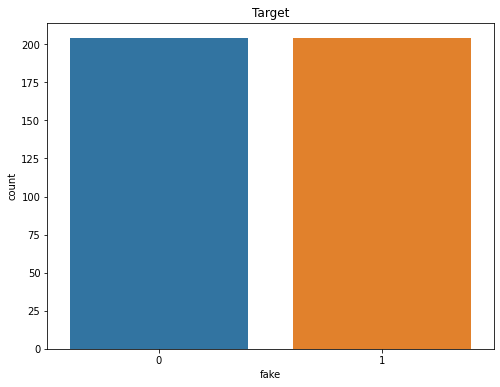

In [6]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(df['fake'])
plt.title('Target')
plt.show()

In [7]:
X = df["text"]
y = df["fake"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((285,), (285,), (123,), (123,))

## Vectorization

In [10]:
cv = CountVectorizer(stop_words="english")

In [11]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()

In [14]:
dt.fit(X_train_cv,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
y_pred = dt.predict(X_test_cv)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.19      0.16      0.18        68
           1       0.14      0.16      0.15        55

    accuracy                           0.16       123
   macro avg       0.16      0.16      0.16       123
weighted avg       0.17      0.16      0.16       123



## Tfidf

In [17]:
tfidf = TfidfVectorizer(stop_words="english")

In [18]:
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
y_pred = dt.predict(X_test_tf)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.24      0.24      0.24        68
           1       0.07      0.07      0.07        55

    accuracy                           0.16       123
   macro avg       0.16      0.15      0.15       123
weighted avg       0.16      0.16      0.16       123



In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tf, y_train)
y_pred = lr.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.07      0.09        68
           1       0.20      0.29      0.24        55

    accuracy                           0.17       123
   macro avg       0.16      0.18      0.16       123
weighted avg       0.15      0.17      0.16       123



In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tf,y_train)
y_pred = lr.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.07      0.09        68
           1       0.20      0.29      0.24        55

    accuracy                           0.17       123
   macro avg       0.16      0.18      0.16       123
weighted avg       0.15      0.17      0.16       123



In [24]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train_tf,y_train)
y_pred = lr.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.07      0.09        68
           1       0.20      0.29      0.24        55

    accuracy                           0.17       123
   macro avg       0.16      0.18      0.16       123
weighted avg       0.15      0.17      0.16       123

